In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix

In [21]:
yelp = pd.read_csv('yelp_2k.csv')
data = yelp[['text','stars']]
def lower_case(x):
    return x.lower()
data['text'] = data['text'].apply(lower_case)
vector = CountVectorizer()
s = []
for i in data['text']:
    s.append(i)
rank_word = sorted(np.sum(np.array(vector.fit_transform(s).toarray()),axis = 0))[::-1]
plt.figure()
plt.scatter(x = range(len(rank_word)),y = rank_word,label = 'counts')
plt.xlabel('Wordrank')
plt.ylabel('Wordcount')
plt.title('word frequency')
plt.legend()
plt.savefig('1.png')
plt.close()


/home/guangya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


for
the
in
to
was
my
is
and
of
it


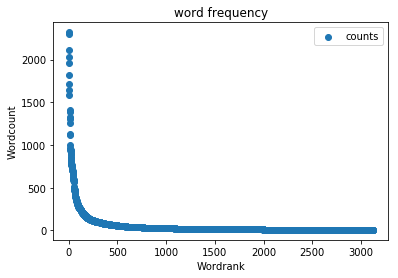

In [22]:
plt.scatter(x = range(len(rank_word)),y = rank_word,label = 'counts')
plt.xlabel('Wordrank')
plt.ylabel('Wordcount')
plt.title('word frequency')
plt.legend()
plt.savefig('2.png')

In [5]:
count_vec = np.sum(np.array(vector.fit_transform(s).toarray()),axis = 0)
# I decide to make stop word as the top10 word
remove_index = []
for i in rank_word[:10]:
    remove_index.append(np.argwhere(count_vec == i)[0][0])
stop_words = []
for k,v in vector.vocabulary_.items():
    if(v in remove_index):
        print(k) # stop words
        stop_words.append(k)
vector = CountVectorizer(stop_words=stop_words, max_df=0.95,min_df= 5)
rank_word = sorted(np.sum(np.array(vector.fit_transform(s).toarray()),axis = 0))[::-1]

cus_x = vector.transform(['horrible customer service']).toarray()

knn = NearestNeighbors(5,metric='cosine')
knn.fit(data_x)
result = knn.kneighbors(cus_x)

In [35]:
for i in range(len(result[1][0])):
    idx = result[1][0][i]
    print('This is for review ' + str(idx) + " : \n" + data['text'][idx],'\n' + "The scores for this result is ",result[0][0][i],'\n')
    print()

This is for review 1808 : 
rogers ...

1) is over priced
2) have horrible customer service
3) faulty and incorrect billing
4) poor customer service
5) not enough options
6) never arrive for an appointment 
The scores for this result is  0.3845425451033363 


This is for review 90 : 
horrible service, horrible customer service, and horrible quality of service!  do not waste your time or money using this company for your pool needs.  dan (602)363-8267 broke my pool filtration system and left it in a nonworking condition.  he will not repair the issue he caused, and told me to go somewhere else.  

save yourself the hassle, there are plenty of other quality pool companies out there.  

take care! 
The scores for this result is  0.550949790630291 


This is for review 729 : 
service was horrible came with a major attitude. payed 30 for lasagna and was no where worth it. won't ever be going back and will never recommend this place. was treated absolutely horrible. horrible. 
The scores for 

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_x, data['stars'].values, test_size=0.1, random_state=42)

In [9]:
# The first 3 are pretty good, but the last 2 do not match

In [10]:
Logit = LogisticRegression(solver = 'liblinear')

In [11]:
Logit.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [12]:
def get_accuracy(y_pred,y_test):
    return sum(y_pred == y_test) / len(y_test)
get_accuracy(Logit.predict(X_test),y_test) # testing

0.92

In [13]:
get_accuracy(Logit.predict(X_train),y_train) # training

0.9994444444444445

Text(0,0.5,'Count')

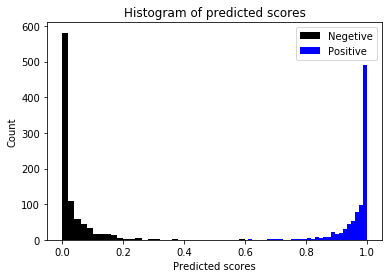

In [14]:
prob_data = np.hstack((y_train[:,np.newaxis],Logit.predict_proba(X_train)[:,1][:,np.newaxis])) 
plt.hist(prob_data[prob_data[:,0] == 1][:,1], color = 'black',label = 'Negetive',bins = 30)
plt.hist(prob_data[prob_data[:,0] == 5][:,1], color = 'blue',label = 'Positive',bins = 30)
plt.legend()
plt.title('Histogram of predicted scores')
plt.xlabel('Predicted scores')
plt.ylabel('Count')

In [15]:
def adjust_threshold(prob,t):
    results = []
    for p in prob:
        if(p[1] >= t):
            results.append(5)
        else:
            results.append(1)
    return results

In [76]:
Threshold = 0.216 # since the tails of positive group seems to be longer, which means it might have more outliers
y_pred_test = adjust_threshold(Logit.predict_proba(X_test),Threshold)
y_pred_train = adjust_threshold(Logit.predict_proba(X_train),Threshold)
get_accuracy(y_pred_test,y_test) # test set improves, 

0.93

In [77]:
get_accuracy(y_pred_train,y_train)

0.9938888888888889

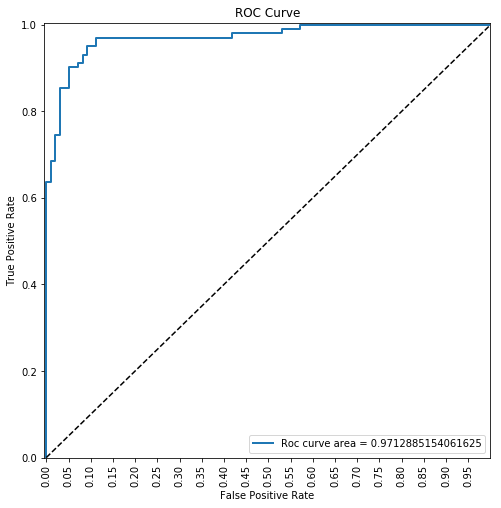

In [18]:
def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=('Roc curve area = ' + str(auc(fpr, tpr))))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc='best')
    plt.savefig('3.png')
fpr, tpr, auc_thresholds = roc_curve(y_test,Logit.predict_proba(X_test)[:,1],pos_label=5)
plot_roc_curve(fpr, tpr)

In [70]:
print(fpr)

[0.         0.         0.         0.01020408 0.01020408 0.02040816
 0.02040816 0.03061224 0.03061224 0.05102041 0.05102041 0.07142857
 0.07142857 0.08163265 0.08163265 0.09183673 0.09183673 0.1122449
 0.1122449  0.41836735 0.41836735 0.53061224 0.53061224 0.57142857
 0.57142857 1.        ]


In [71]:
print(tpr)

[0.         0.00980392 0.6372549  0.6372549  0.68627451 0.68627451
 0.74509804 0.74509804 0.85294118 0.85294118 0.90196078 0.90196078
 0.91176471 0.91176471 0.93137255 0.93137255 0.95098039 0.95098039
 0.97058824 0.97058824 0.98039216 0.98039216 0.99019608 0.99019608
 1.         1.        ]


In [75]:
print(auc_thresholds[18])

0.2160892107144966
